# Analyse the Optimal policy
We foucs on the optimal policy esults for the same simulations presented in the Informs talk as ''Prosumer choice formulatedas Multi Armed Bandit problem - RL application''

In [92]:
# Import packages
import numpy as np
import pandas as pd
import pickle as pkl
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Read pickle file
wok_dir = Path.cwd()
filename = 'sim_results_fixed_target_15_exp_replay.pkl'
path_file = wok_dir / filename
data = pkl.load(open(path_file, 'rb')) # Read file
# Plot parameters
plt_colmap = plt.get_cmap("tab10", 15)
sns.set_style("whitegrid")

# Add the success rate - Important for later
df = data['outcome']
no_agents = len(df)
for i in range(no_agents):
    gamma = df[i]['total_rd'] / df[i]['final_step']
    df[i].insert(2, 'gamma_rate', gamma, True)
data['outcome'] = df

In [93]:
## Define Plot functions

# Plot the policy per agent per episode
def plot_action_choice(policy, epi_id, y_lim, size=(10,8)):
    # Plot parameters
    no_steps = policy.shape[1]
    fig = plt.figure(figsize=size)
    x = np.arange(0, no_steps)
    y1 = policy[0,:,epi_id].astype(int)
    # Subplot 1
    ax1 = fig.add_subplot(211)
    ax1.scatter(x, y1, cmap=plt_colmap, c=y1, marker='.', alpha=1)
    ax1.set_ylim(0,y_lim)
    #fig.colorbar(ax=ax1) # fix it!!!
    # Subplot 2
    ax2 = fig.add_subplot(212)
    ax2.bar(x, policy[1,:,epi_id])
    return fig, ax1, ax2


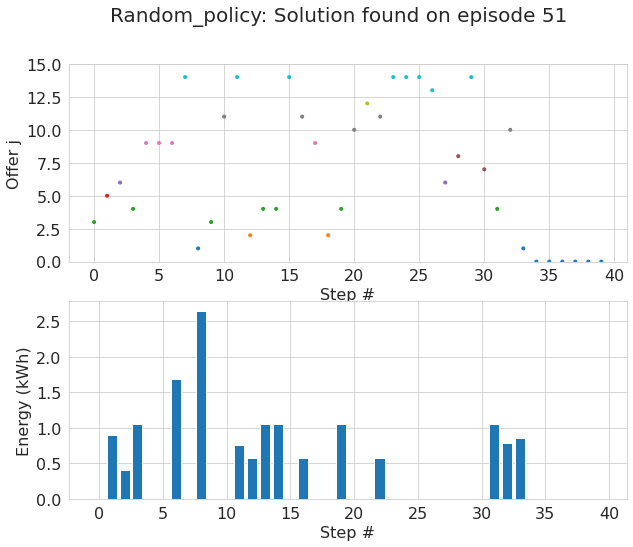

In [107]:
pol_sol = data['policy'] # Optimal policy per agent
ag_label = data['agents']['id'] # Agent type (Random, Epsilon-greedy, Thompson-Sampler)
no_offers = data['simulation']['environment'].no_offers # No of offers to trade with
no_epi = data['simulation']['episodes'] # Episodes #
# Plot parameters
ag_id = 1 # Agent type (0, 1, 2...)
epi_id = 50 # Episode id
ax_label = ['Step #', 'Offer j', 'Energy (kWh)']
ax_size = 16
fig, ax1, ax2 = plot_action_choice(pol_sol[ag_id], epi_id, no_offers) # Make the plot
# Set labels and title of Subplot 1
ax1.set_xlabel(xlabel=ax_label[0], fontsize=ax_size)
ax1.set_ylabel(ylabel=ax_label[1], fontsize=ax_size)
ax1.tick_params(axis='x', labelsize=ax_size)
ax1.tick_params(axis='y', labelsize=ax_size)
# Set labels and title of Subplot 2
ax2.set_xlabel(xlabel=ax_label[0], fontsize=ax_size)
ax2.set_ylabel(ylabel=ax_label[2], fontsize=ax_size)
ax2.tick_params(axis='x', labelsize=ax_size)
ax2.tick_params(axis='y', labelsize=ax_size)
# Set title
#[ax[i].set_title(subplot_title[i], fontsize=18) for i in range(len(ax))]
fig.suptitle(f'{ag_label[ag_id]}: Solution found on episode {epi_id}', fontsize=20)
plt.show()

In [95]:

# Plot the reward per episode and RL_agent
def plot_time_series(df_score, y_feat, epi_id, plt_label, plt_marker, size=(10,8), y_sum=False):
    # Get the plot parameters
    no_RL_agents = len(df_score)
    no_steps = df_score[0].shape[1]
    fig, ax1 = plt.subplots(figsize=size)
    ax2 = ax1.twinx()
    x = np.arange(0, no_steps)
    for i in range(no_RL_agents):
        # Primary y-axis
        y = df_score[i][y_feat[0], :, epi_id]
        #y = np.cumsum(y) if y_sum else y
        ax1.plot(x, y, label=plt_label[i], marker=plt_marker[i], linestyle='-')
        # Secundary y-axis
        y = df_score[i][y_feat[1], :, epi_id]
        y = np.cumsum(y) if y_sum else y
        ax2.plot(x, y, label=plt_label[i], marker=plt_marker[i], linestyle='--', alpha=0.5)

ax_label = ['Episode #', 'Total reward']
epi_rnd = np.random.choice(no_epi, 3)
for epi_id in epi_rnd:
    plot_time_series(data['policy'][0:2], [4, 2], epi_id, label, marker, (15,8))
    plt.legend(fontsize=ax_size)
    plt.ylabel(ax_label[1], fontsize=ax_size)
    plt.xticks(fontsize=ax_size)
    plt.yticks(fontsize=ax_size)
    plt.xlabel(ax_label[0], fontsize=ax_size)
    plt.title(f'episode {epi_id}: Theta and Reward per step n', fontsize=20)
plt.show()

NameError: name 'label' is not defined